In [ ]:
# !pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import os

In [ ]:
# data retrieved from:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')

In [ ]:
# show data
print("shape of data: ", df.shape)
print(df.columns)
df

shape of data:  (1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Analyzing the Data



----Null Count----
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


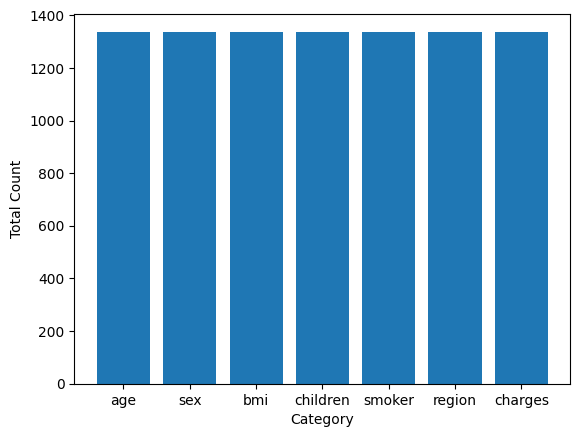

In [ ]:
# look for imbalance total data
count = df.count() # all data has 1338 total, meaning there is no nan data
null_counts = df.isnull().sum()
print("----Null Count----")
print(null_counts)

plt.bar(df.columns, count)
plt.ylabel("Total Count")
plt.xlabel("Category")
plt.show()

age
18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
dtype: int64


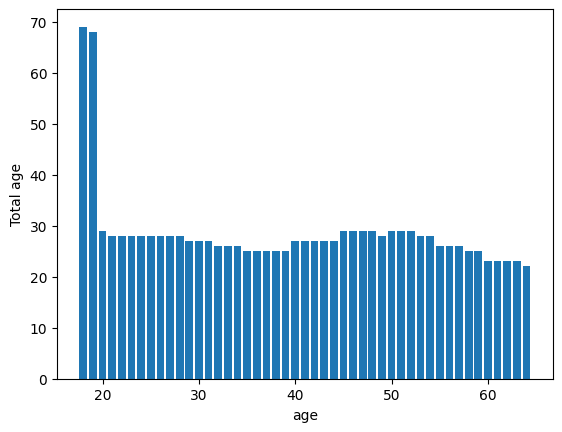

In [ ]:
# looks for imbalance in age. Very skewed towards the younger ones
age = df.groupby("age").size()
print(age[:10])

plt.bar(age.index, age.values)
plt.ylabel("Total age")
plt.xlabel("age")
plt.show()

sex
female    662
male      676
dtype: int64


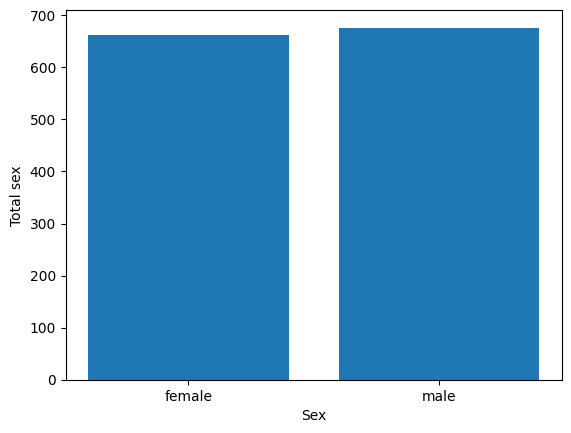

In [ ]:
# looks for imbalance in sex. It is very close
sex = df.groupby("sex").size()
print(sex)

plt.bar(sex.index, sex.values)
plt.ylabel("Total sex")
plt.xlabel("Sex")
plt.show()

Mean BMI: 30.66339686098655


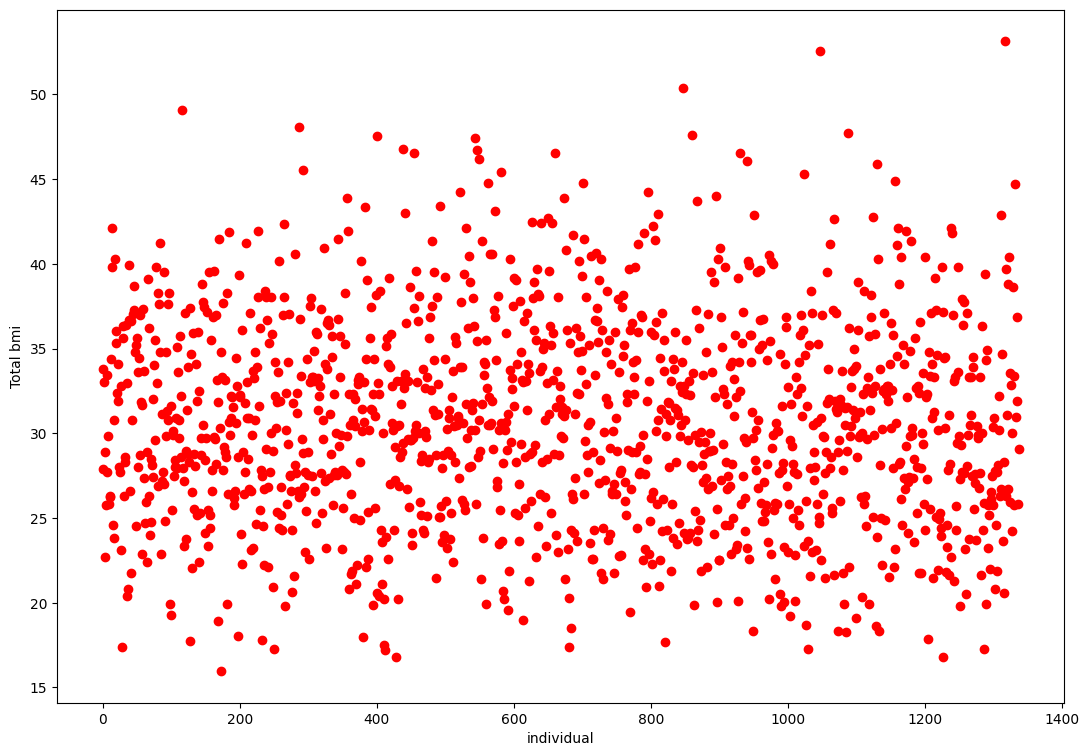

In [ ]:
# looks for imbalance in bmi. Skewed heavily towards the middle
print("Mean BMI:", df.bmi.mean())

plt.figure(figsize=(13,9))
plt.plot(df.bmi, 'ro')
plt.ylabel("Total bmi")
plt.xlabel("individual")
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64


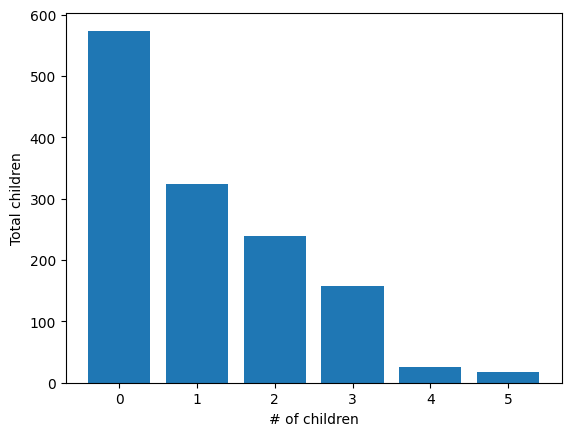

In [ ]:
# looks for imbalance in children. Skewed towards lower numbers
children = df.groupby("children").size()
print(children)

plt.bar(children.index, children.values)
plt.ylabel("Total children")
plt.xlabel("# of children")
plt.show()

smoker
no     1064
yes     274
dtype: int64


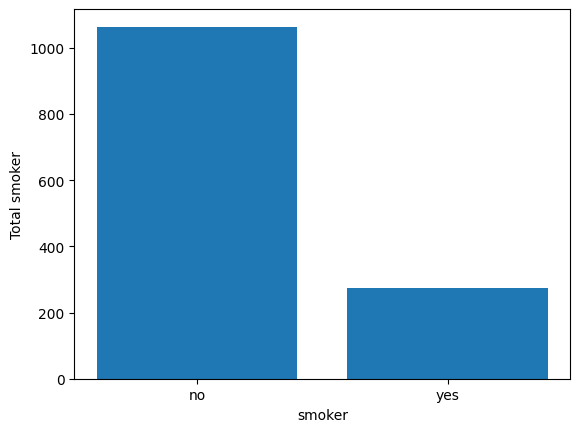

In [ ]:
# looks for imbalance in smoker. Skewed towards non smokers
smoker = df.groupby("smoker").size()
print(smoker)

plt.bar(smoker.index, smoker.values)
plt.ylabel("Total smoker")
plt.xlabel("smoker")
plt.show()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


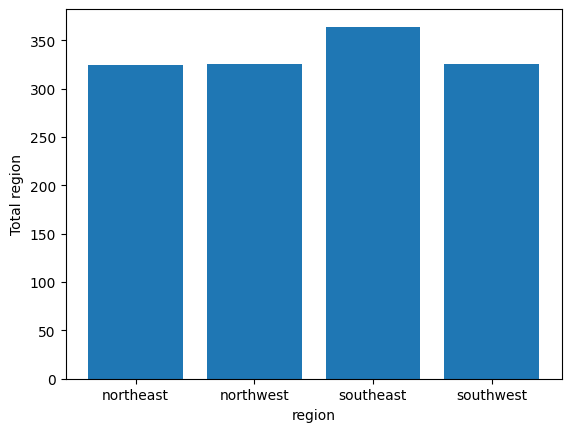

In [ ]:
# looks for imbalance in sex. Seems like there is a bit more for southeast
region = df.groupby("region").size()
print(region)

plt.bar(region.index, region.values)
plt.ylabel("Total region")
plt.xlabel("region")
plt.show()

In [ ]:
print(df.charges.mean())

13270.422265141257


Mean Charge: 13270.422265141257


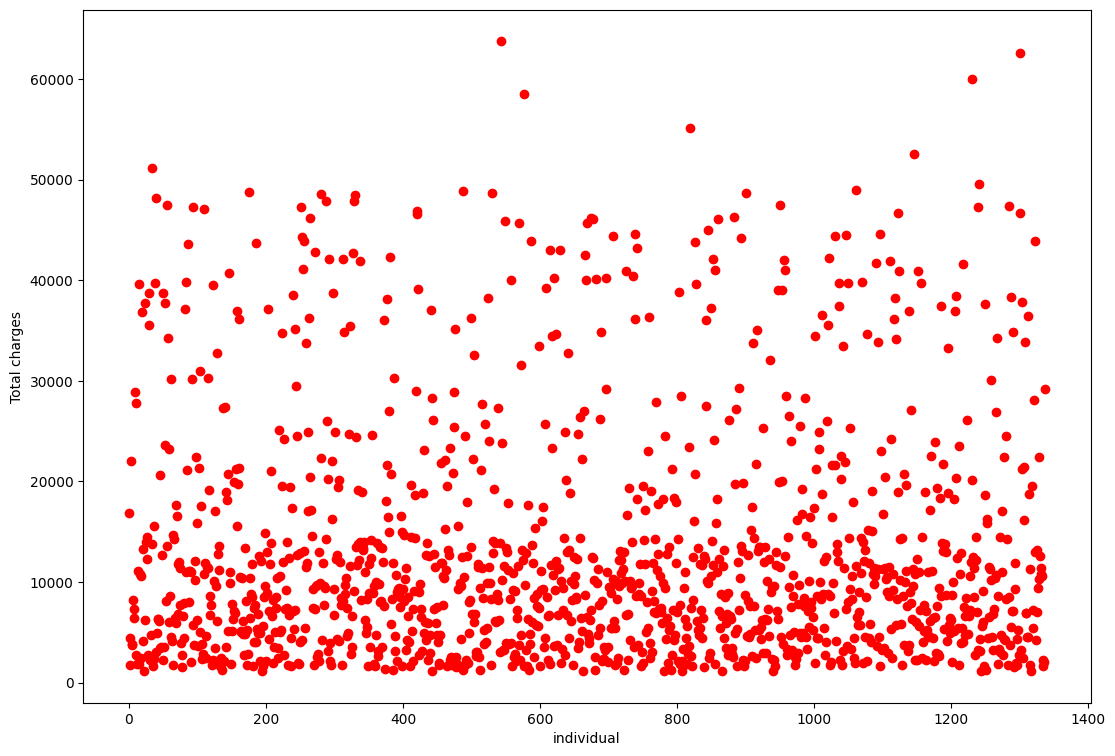

In [ ]:
print("Mean Charge:" , df.charges.mean())

plt.figure(figsize=(13,9))
plt.plot(df.charges, 'ro')
plt.ylabel("Total charges")
plt.xlabel("individual")
plt.show()

# Comparison within Data

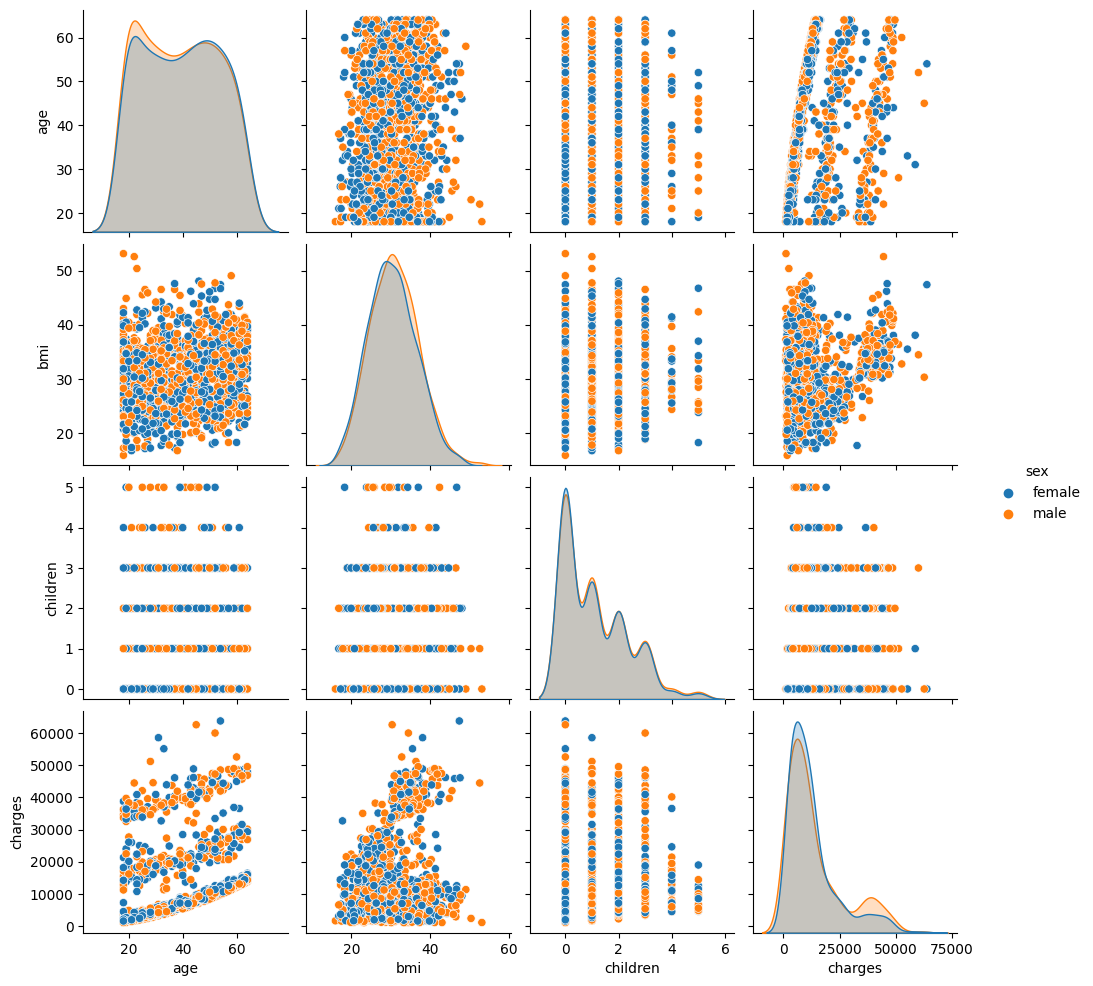

In [ ]:
# Sex
sns.pairplot(data=df, hue="sex")

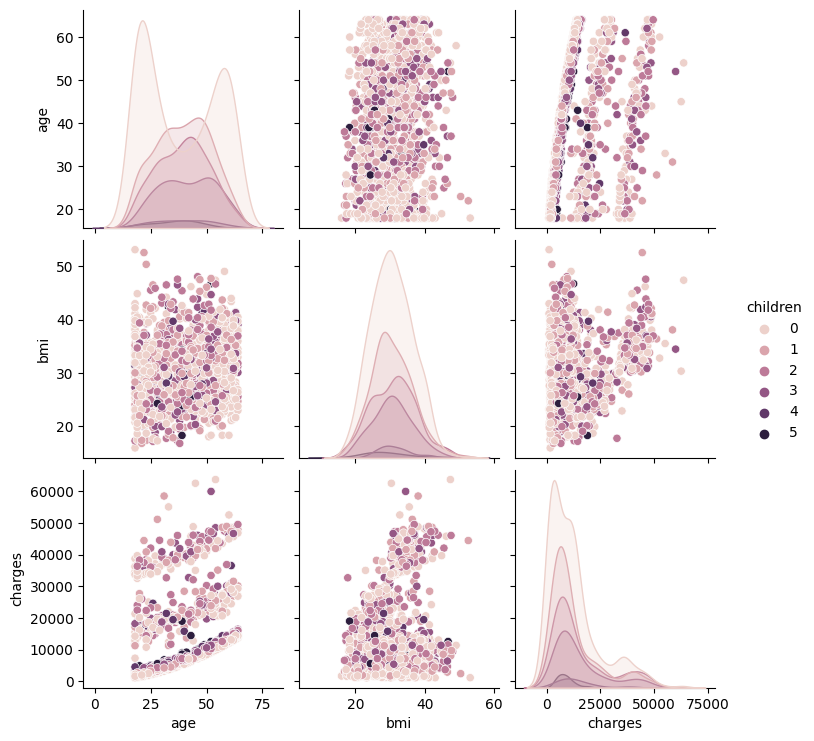

In [ ]:
# Children
sns.pairplot(data=df, hue="children")

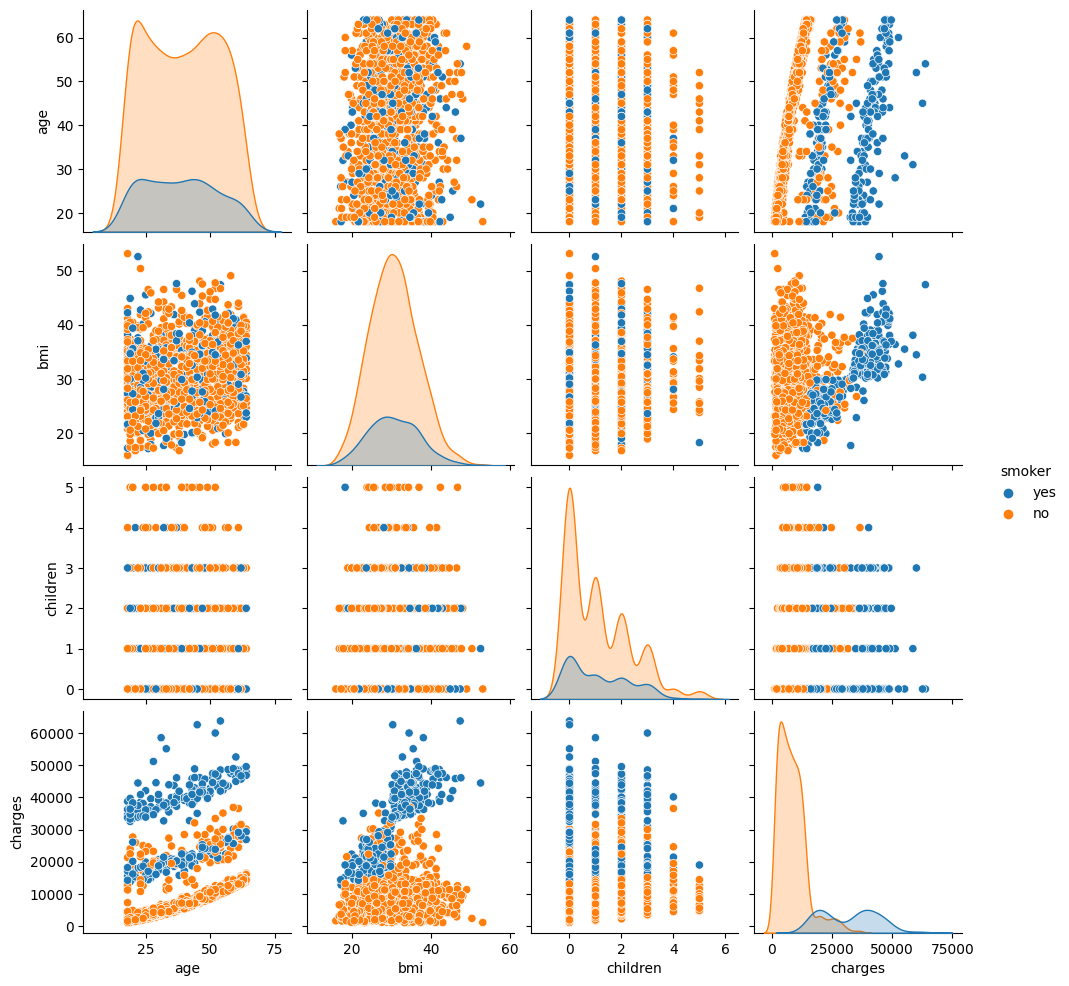

In [ ]:
# Smoker
sns.pairplot(data=df, hue="smoker")

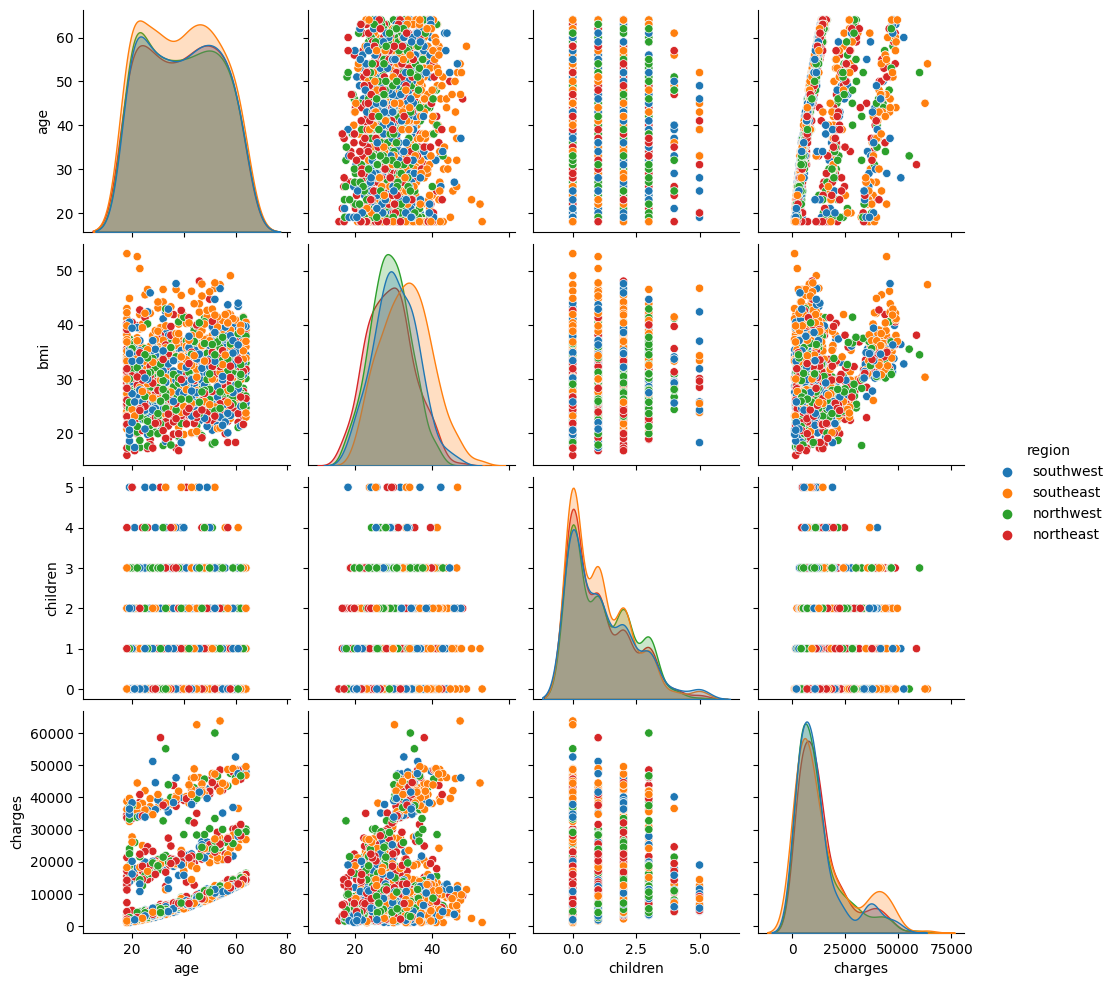

In [ ]:
# Region
sns.pairplot(data=df, hue="region")

# Setup Model for testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le_smoker = LabelEncoder()
le_sex = LabelEncoder()
le_region = LabelEncoder()
sc_X = MinMaxScaler()
sc_Y = MinMaxScaler()

In [ ]:
# split the data
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = df[['charges']]

# print(type(X))
# print(type(Y))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(X['smoker'].value_counts())
print(X['sex'].value_counts())
print(X['region'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64
male      676
female    662
Name: sex, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
X['smoker'] = le_smoker.fit_transform(X['smoker'])
X['sex'] = le_sex.fit_transform(X['sex'])
X['region'] = le_region.fit_transform(X['region'])

<ipython-input-335-6305b6e40228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = le_smoker.fit_transform(X['smoker'])
<ipython-input-335-6305b6e40228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le_sex.fit_transform(X['sex'])
<ipython-input-335-6305b6e40228>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
print(X['smoker'].value_counts())
print(X['sex'].value_counts())
print(X['region'].value_counts())

0    1064
1     274
Name: smoker, dtype: int64
1    676
0    662
Name: sex, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [ ]:
for i in range(le_region.classes_.shape[0]):
  print(f"{i} = {le_region.classes_[i]}")
print(type(X))

0 = northeast
1 = northwest
2 = southeast
3 = southwest
<class 'pandas.core.frame.DataFrame'>


In [ ]:
columns_to_scale = [0, 2, 3]
X.iloc[:, columns_to_scale] = sc_X.fit_transform(X.iloc[:, columns_to_scale])

X.head()

<ipython-input-338-115eaea64714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[:, columns_to_scale] = sc_X.fit_transform(X.iloc[:, columns_to_scale])


,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,3
1,0.000000,1,0.479150,0.2,0,2
2,0.217391,1,0.458434,0.6,0,2
3,0.326087,1,0.181464,0.0,0,1
4,0.304348,1,0.347592,0.0,0,1


In [ ]:
# split the data by column
Y = sc_Y.fit_transform(Y)
print(type(Y))

array([[0.25161076],
       [0.00963595],
       [0.05311516],
       ...,
       [0.00810808],
       [0.01414352],
       [0.44724873]])

In [ ]:
print("X:")
print(X.shape)
print(X)

print("\nY:")
print(Y.shape)
print(Y)

X:
(1338, 6)
           age  sex       bmi  children  smoker  region
0     0.021739    0  0.321227       0.0       1       3
1     0.000000    1  0.479150       0.2       0       2
2     0.217391    1  0.458434       0.6       0       2
3     0.326087    1  0.181464       0.0       0       1
4     0.304348    1  0.347592       0.0       0       1
...        ...  ...       ...       ...     ...     ...
1333  0.695652    1  0.403820       0.6       0       1
1334  0.000000    0  0.429379       0.0       0       0
1335  0.000000    0  0.562012       0.0       0       2
1336  0.065217    0  0.264730       0.0       0       3
1337  0.934783    0  0.352704       0.0       1       1

[1338 rows x 6 columns]

Y:
(1338, 1)
[[0.25161076]
 [0.00963595]
 [0.05311516]
 ...
 [0.00810808]
 [0.01414352]
 [0.44724873]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset into 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(X_train.shape)
X_train[0:5]

(1070, 6)


,age,sex,bmi,children,smoker,region
560,0.608696,0,0.107345,0.4,0,1
1285,0.630435,0,0.224913,0.0,0,0
1142,0.739130,0,0.239440,0.0,0,2
969,0.456522,0,0.493947,1.0,0,2
486,0.782609,0,0.148238,0.6,0,1


In [ ]:
print(X_test.shape)
X_test[0:5]

(268, 6)


,age,sex,bmi,children,smoker,region
764,0.586957,0,0.247915,0.4,0,0
887,0.391304,0,0.378262,0.0,0,1
890,1.000000,0,0.293920,0.0,1,1
1293,0.608696,1,0.263250,0.6,0,1
259,0.021739,1,0.429379,0.0,1,1


In [ ]:
print(Y_train.shape)
Y_train[0:5]

(1070, 1)


array([[0.12884519],
       [0.11832353],
       [0.41495163],
       [0.11931567],
       [0.18122489]])

In [ ]:
print(Y_test.shape)
Y_test[0:5]

(268, 1)


array([[0.12726861],
       [0.06624737],
       [0.4502755 ],
       [0.13056997],
       [0.52081677]])

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# structure of model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                448       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the data
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# fit the model
result = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))
# model.fit(X_train, Y_train, epochs=100, batch_size=107)

Epoch 1/50
34/34 [==============================] - 1s 8ms/step - loss: 0.0376 - val_loss: 0.0142
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0112
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0098
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 8/50
34/34 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 10/50
34/34 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 11/50
34/34 [

# Evaluting the Model

In [ ]:
result.history.keys()

dict_keys(['loss', 'val_loss'])

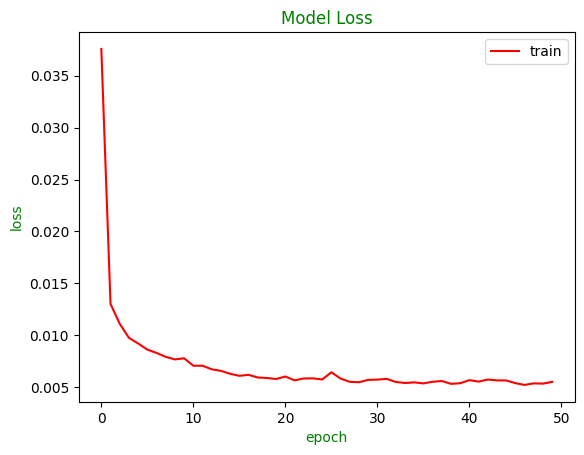

In [ ]:
loss = result.history['loss']
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
results = model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.0058


In [ ]:
predictions = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


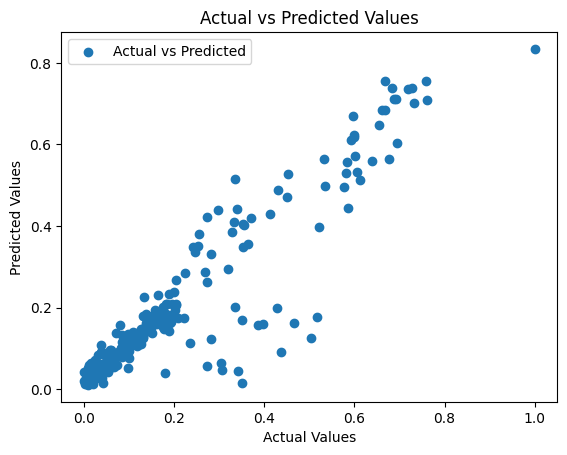

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions, marker='o', label='Actual vs Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [ ]:
# Custom input
new_X = [20, "male", 30.0, 0, 'no', 'northwest']
new_X2 = [20, "male", 30.0, 0, 'yes', 'northwest']

# Define column names
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create a DataFrame
new_X_df = pd.DataFrame([new_X], columns=columns)
new_X_df2 = pd.DataFrame([new_X2], columns=columns)


# Display the DataFrame
print(new_X_df)
print(new_X_df2)

# LabelEncode select columns
new_X_df['smoker'] = le_smoker.transform(new_X_df['smoker'])
new_X_df['sex'] = le_sex.transform(new_X_df['sex'])
new_X_df['region'] = le_region.transform(new_X_df['region'])

new_X_df2['smoker'] = le_smoker.transform(new_X_df2['smoker'])
new_X_df2['sex'] = le_sex.transform(new_X_df2['sex'])
new_X_df2['region'] = le_region.transform(new_X_df2['region'])

# MinMaxScale specific columns
columns_to_scale = [0, 2, 3]
new_X_df.iloc[:, columns_to_scale] = sc_X.transform(new_X_df.iloc[:, columns_to_scale])
new_X_df2.iloc[:, columns_to_scale] = sc_X.transform(new_X_df2.iloc[:, columns_to_scale])

# Make predictions
predictions = model.predict(new_X_df)
predictions2 = model.predict(new_X_df2)

# Inverse MinMaxScaler
predictions = sc_Y.inverse_transform(predictions)
predictions2 = sc_Y.inverse_transform(predictions2)
print("\nPredicted Insurance Charges for non-smoker:", predictions[0][0])
print("\nPredicted Insurance Charges for smoker:", predictions2[0][0])

   age   sex   bmi  children smoker     region
0   20  male  30.0         0     no  northwest
   age   sex   bmi  children smoker     region
0   20  male  30.0         0    yes  northwest
1/1 [==============================] - 0s 43ms/step


<ipython-input-389-0595e3ca127b>:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_X_df.iloc[:, columns_to_scale] = sc_X.transform(new_X_df.iloc[:, columns_to_scale])
<ipython-input-389-0595e3ca127b>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_X_df2.iloc[:, columns_to_scale] = sc_X.transform(new_X_df2.iloc[:, columns_to_scale])


1/1 [==============================] - 0s 40ms/step

Predicted Insurance Charges for non-smoker: 2215.6538

Predicted Insurance Charges for smoker: 23181.562
